<h1 style="text-align:center">Análisis exploratorio</h1>


### Importamos las librerias necesarias

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### Importamos el dataframe

In [9]:
df = pd.read_csv("data/archive/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [23]:
print(f"Cantidad de registros: {df.shape[0]}")

Cantidad de registros: 14640


### ¿Cómo están distribuidas las categorias?

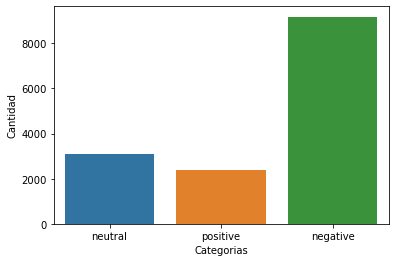

In [24]:
aux = sns.countplot(data=df, x="airline_sentiment");
aux.set(xlabel="Categorias", ylabel='Cantidad')
plt.show()

### ¿Qué tópicos son los más hablados?

Palabras más usadas en tweets negativos:


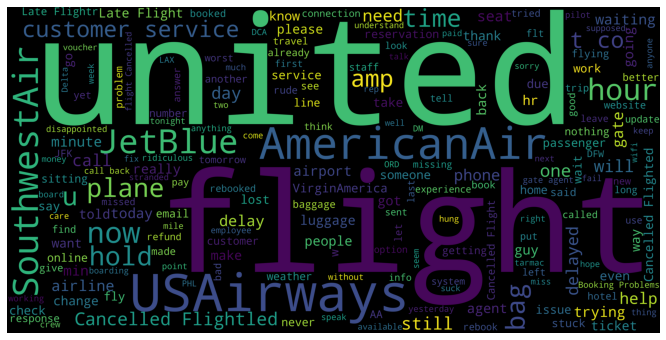

In [34]:
stopwords = set(STOPWORDS)
new_data=df[df['airline_sentiment']=='negative']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(
  background_color='black',
  stopwords=stopwords,
  width=5000,
  height=2500,

  random_state=200
).generate(words)

fig = plt.figure(figsize=(100,6))
plt.imshow(wordcloud)
plt.axis('off')
print("Palabras más usadas en tweets negativos:")
plt.show();

Palabras más usadas en tweets positivos:


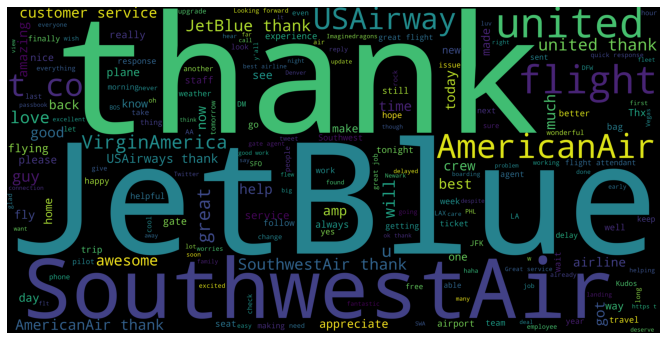

In [35]:
stopwords = set(STOPWORDS)
new_data=df[df['airline_sentiment']=='positive']
words = ' '.join(new_data['text'])
cleaned_word=' '.join([word for word in words.split()
                         if 'http' not in word
                         and not word.startswith('@')
                          and word !='RT'])
wordcloud = WordCloud(
  background_color='black',
  stopwords=stopwords,
  width=5000,
  height=2500,

  random_state=200
).generate(words)

fig = plt.figure(figsize=(100,6))
plt.imshow(wordcloud)
plt.axis('off')
print("Palabras más usadas en tweets positivos:")
plt.show();

### Porcentaje de valores nulos

In [19]:
df.isnull().sum() * 100 / len(df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64